In [1]:
# In this notebook:

# scrape text and image from blog
# scrape comment section

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

## General blog scraping

In [3]:
blog_url = 'https://tim.blog/'
html = urlopen(blog_url)
res = BeautifulSoup(html.read(),'html5lib')
# scrape Tim Ferriss' blog

In [4]:
if res.title == None:
    print('No title found')
else:
    print(res.title.getText())

The Blog of Author Tim Ferriss | Tim Ferriss's 4-Hour Workweek and Lifestyle Design Blog


In [5]:
tags = res.findAll('h1', {'class':'entry-title'})

for tag in tags:
    print(tag.getText())
# we see that it stops at 351; 350 and on require loading... will have to improve on this

The 25 Most-Clicked Links from My Newsletter in 2018
Greg McKeown — How to Master Essentialism (#355)
Forget New Year’s Resolutions and Conduct a ‘Past Year Review’ Instead
How to Generate 8-Figure Revenue at Age 21 (Or Any Age) — Real 4-Hour Workweek Case Studies (#354)
Patrick Collison — CEO of Stripe (#353)
Dr. Peter Attia vs. Tim Ferriss (#352)
Real 4-Hour Workweek Case Studies — Allen Walton and SpyGuy, The Path to Seven Figures (#351)


In [6]:
tags = res.findAll('span', {'class':'comments-link'})

for tag in tags:
    print(tag.getText())
# we see that it stops at 351; 350 and on require loading... will have to see how to engage this

8 Comments
42 Comments
46 Comments
38 Comments
22 Comments
48 Comments
15 Comments


In [7]:
tags = res.findAll('div', {'class':'entry-content'})

for tag in tags:
    print(len(tag.getText()))
# article length

9837
3196
1877
4202
3484
5676
4426


In [8]:
tags = res.find('div', {'class':'entry-content'})
tags = tags.findAll('a', {'href':re.compile("https*")})[:5]

for tag in tags:
    print(tag.text)
    print(tag.get('href'))
# first 10 urls and their description

5-Bullet Friday
https://go.tim.blog/5-bullet-friday-1/
you can subscribe to 5-Bullet Friday here
https://go.tim.blog/5-bullet-friday-1/
a 40×30 print of this
https://www.instagram.com/p/BeRfamHFkPa/?taken-by=timferriss
On Needing to Find Something to Worry About
https://www.theschooloflife.com/thebookoflife/on-needing-to-find-something-to-worry-about/
Taming the Mammoth: Why You Should Stop Caring What Other People Think
https://waitbutwhy.com/2014/06/taming-mammoth-let-peoples-opinions-run-life.html


## Comment scraping

In [9]:
comment_url = 'https://tim.blog/2019/01/09/greg-mckeown-essentialism/#comments'
html = urlopen(comment_url)
res = BeautifulSoup(html.read(),'html5lib')

In [10]:
tags = res.findAll('article', {'class': 'comment-body'})[:3]

for tag in tags:
    author = tag.find('cite', {'class':'fn'})
    comment = tag.find('div', {'class':'comment-content'})
    print(author.getText())
    print(comment.getText())
# first 3 commenters names and comments

Ben

					This is the most important book I’ve ever read, especially for one lesson:
Everything is a tradeoff, and you’re lying to yourself if you think you can have it all. I told this lie to myself many times, and I catch myself still doing it. “Oh I’m gonna get in shape, have a great family, get promoted, start a business, learn piano, etc.”
LikeLiked by 2 people
				
brandonmoody

					This light of this podcast interrupted my first personal deep dive session into spiral dynamics and systems thinking at an interesting time, at an interesting point in the video I was watching. I believe in these powerful moments, so I interrupted my video to listen to this and it was the answer I was looking to and affirmed the beauty and truth of people who are trying to live in the yellow level. I deeply believe now that yellow level thinking and being will change the world, change my world,and I will be transforming my dramatically increasing thinking about stoicism, spiral dynamics and essential

## Image scraping

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

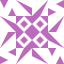

In [12]:
tag = res.find('article', {'class': 'comment-body'})
tag = tag.find('img', {'src':re.compile("https://*")})
img_url = tag.attrs['src']
img = Image.open(urlopen(img_url))

img

In [13]:
# this concludes pt 01